# Analyzing Bay Wheels December 2019 Data
## by Ibrahim Olayiwola

### Introduction
Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate, a subsidiary of Lyft, in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations it is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

The data used for this analysis is that of **December 2019** and it can be found [here](https://s3.amazonaws.com/baywheels-data/index.html).

#### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- There are 16 columns and 183412 rows.
- Some columns have empty rows.
- Some columns have the wrong datatypes, this will be detailed during assessment of the dataset.

### Assessing Data

#### Visual Assessment
> This dataset was also assessed using Microsoft Excel.

In [4]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
5210,448,2019-02-28 13:45:01.4940,2019-02-28 13:52:29.5070,85.0,Church St at Duboce Ave,37.770083,-122.429156,131.0,22nd St at Dolores St,37.755000,-122.425728,6631,Subscriber,1983.0,Male,No
114274,895,2019-02-12 09:38:57.5370,2019-02-12 09:53:52.7370,108.0,16th St Mission BART,37.764710,-122.419957,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,5327,Subscriber,1960.0,Female,No
56344,1236,2019-02-21 08:53:23.1680,2019-02-21 09:13:59.8440,125.0,20th St at Bryant St,37.759200,-122.409851,343.0,Bryant St at 2nd St,37.783172,-122.393572,6351,Customer,1984.0,Female,No
152705,1300,2019-02-06 14:43:26.8600,2019-02-06 15:05:07.7880,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,53.0,Grove St at Divisadero,37.775946,-122.437777,5148,Subscriber,1984.0,Female,No
159113,201,2019-02-05 18:22:55.3670,2019-02-05 18:26:16.8480,26.0,1st St at Folsom St,37.787290,-122.394380,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,4943,Subscriber,1982.0,Female,No
38735,390,2019-02-23 11:20:28.4850,2019-02-23 11:26:59.0750,74.0,Laguna St at Hayes St,37.776435,-122.426244,54.0,Alamo Square (Steiner St at Fulton St),37.777547,-122.433274,4517,Subscriber,NaN,NaN,No
64554,439,2019-02-20 11:46:15.6790,2019-02-20 11:53:34.8520,286.0,San Carlos St at 11th St,37.336466,-121.876613,310.0,San Fernando St at 4th St,37.335885,-121.885660,131,Subscriber,1957.0,Female,No
14982,313,2019-02-27 10:25:36.9840,2019-02-27 10:30:50.5480,327.0,5th St at San Salvador St,37.332039,-121.881766,316.0,San Salvador St at 1st St,37.330165,-121.885831,6184,Subscriber,1997.0,Male,Yes
55114,436,2019-02-21 11:00:09.0770,2019-02-21 11:07:25.3340,97.0,14th St at Mission St,37.768265,-122.420110,90.0,Townsend St at 7th St,37.771058,-122.402717,545,Subscriber,1993.0,Male,No
68320,132,2019-02-20 00:04:54.7100,2019-02-20 00:07:07.4930,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,4420,Customer,2000.0,Male,No


#### Programmatic Assessment

In [5]:
# Check for empty rows
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Number of bikes
df['bike_id'].nunique()

4646

> There are **4646** unique bike ids. This might mean there are only 4646 bikes available for use.

In [7]:
# Number of start stations
df['start_station_name'].nunique()

329

> There are only **329** stations where a trip was started.

In [8]:
# Number of end stations
df['end_station_name'].nunique()

329

> There are only **329** stations where a trip was ended, which is the same as the start station.]

> This might mean that there are only 329 stations.


In [9]:
# Who rented the bikes? A subscriber or a customer
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

From the above,
- Subcribers used the bikes a total of **163544** times
- Customers used the bikes a total of **19868** times.

In [10]:
# The oldest user
df['member_birth_year'].min()

1878.0

No one who was born in the year 1878 is likely to be alive.

In [11]:
# The youngest user
df['member_birth_year'].max()

2001.0

The youngest user is 18 year old.

In [12]:
# Unique gender
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

There are missing values in the gender column.

From the cells above, we can see that there are some improvements that can be done to the dataset.
Some of the improvements includes
- Change the datatypes of some columns (start_time, end_station_id, bike_id etc)
- Extract the days and hours from start_time and end_time columns
- Calculate minutes from duration_sec column
- Calculate the age of members.
- Drop the latitude and longtitude columns.

### Cleaning Data

In [13]:
# Copying dataset to preserve original data
df_copy = df.copy()
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


**Define**
1. Drop the latitude and longitude columns.

**Code and Test**

In [14]:
# drop latitudes and longitudes columns and rental_access_method column.
df_copy = df_copy.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                   'end_station_longitude'], axis=1)
df_copy.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No


**Define**

2. Drop the rows with empty values.

**Code and Test**

In [15]:
# Drop empty rows
df_copy = df_copy.dropna()

df_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [16]:
# Check for unique values in the data
df_copy.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
end_station_id                329
end_station_name              329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [17]:
 df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   end_station_id           174952 non-null  float64
 6   end_station_name         174952 non-null  object 
 7   bike_id                  174952 non-null  int64  
 8   user_type                174952 non-null  object 
 9   member_birth_year        174952 non-null  float64
 10  member_gender            174952 non-null  object 
 11  bike_share_for_all_trip  174952 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 17.4+ MB


**Define**
1. start_time data type is object. | Change to timestamps.
2. end_time has a data type of object. | Change to timestamps.
3. start_station_id data type is float. | Change to object.
4. end_station_id data type is float. | Change to object.
5. bike_id is of data type int. | Change to object.
5. user_type is object. | Change to category.

**Code**

In [18]:
# Change dates to timestamps
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])


# Change start_station_id, end_station_id and bike_id to object
df_copy['bike_id'] = df_copy['bike_id'].astype(str)
df_copy['start_station_id'] = df_copy['start_station_id'].astype(str)
df_copy['end_station_id'] = df_copy['end_station_id'].astype(str)

# Change user_type to category
df_copy['user_type'] = df_copy['user_type'].astype('category')
df_copy['member_gender'] = df_copy['member_gender'].astype('category')

**Test**

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: category(2), 

**Define**

1. Extract the days, hours from start_time and end_time columns and calculate minutes from duration_sec column.

2. Calculate the age of the users.

In [20]:
# extract start time weekdays
df_copy['start_time_day'] = df_copy['start_time'].dt.strftime('%a')

# extract start time hour
df_copy['start_time_hour'] = df_copy['start_time'].dt.hour

# extract end time weekdays
df_copy['end_time_day'] = df_copy['end_time'].dt.strftime('%a')

# extract end time hour
df_copy['end_time_hour'] = df_copy['end_time'].dt.hour

# Extract the day
df_copy['start_date'] = df_copy['start_time'].dt.day

# Calculate duration time in minute
df_copy['duration_min'] = df_copy['duration_sec'] / 60

**Test**

In [21]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_day,start_time_hour,end_time_day,end_time_hour,start_date,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thu,17,Fri,8,28,869.75
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thu,12,Fri,5,28,1030.90


In [22]:
# Get the members' ages.
df_copy['member_age'] = 2019 - df_copy['member_birth_year']
df_copy['member_age'].head()

0    35.0
2    47.0
3    30.0
4    45.0
5    60.0
Name: member_age, dtype: float64

### Main feature(s) of interest.

> The main features I'm interested in is the time most trips are taken. The days of the week and how factors like the duration of the trip, user type and gender affect the the time. 

### Features in the dataset that will help support investigation into feature(s) of interest.

> The features in the dataset that will help support my investigation includes the start_time weekday, duration, age and user_type columns.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### What is the average daily useage of the bike sharing system?

In [23]:
# Creating functions for the charts and titles
def countplot(x_plot, order):
    """This function plots a seaborn countplot"""
    base_color = sb.color_palette()[0]
    sb.countplot(data = df_copy, x = x_plot, color = base_color, order = order)
    
    
def plot_labels(title, x_label, y_label):
    """This function is to label the plots"""
    plt.title(title, y=1.05, fontsize=15, fontweight='medium')
    plt.xlabel(x_label, y=1.05, fontsize=12, fontweight='medium')
    plt.ylabel(y_label, y=0.5, fontsize=12, fontweight='medium');
    

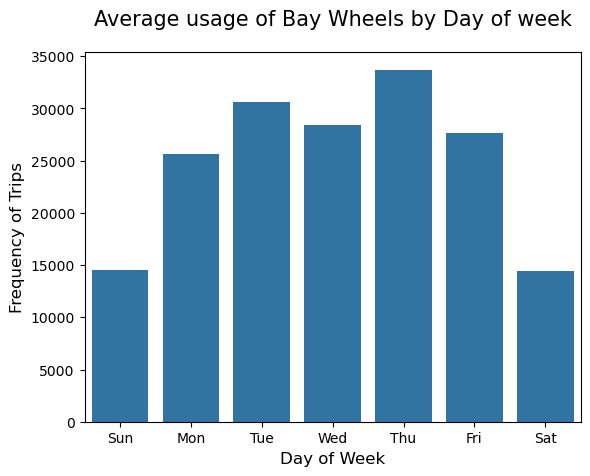

In [24]:
# Daily useage of the bike sharing system
# Input parameters for countplot function.
x_axis = df_copy['start_time_day']
x_order = [ 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Arguments for plot_labels function
title = "Average usage of Bay Wheels by Day of week"
x_label = 'Day of Week'
y_label = 'Frequency of Trips'

# Plotting the chart
countplot(x_plot = x_axis, order = x_order)
plot_labels(title, x_label, y_label)

> From the above, it can be seen that most trips are taken on Tuesdays and Thursdays, and the least trips are taken on Saturdays and Sundays. This might be because people stay more at home on weekends. 

#### What is the average daily peak hour of the bike system using the start time hour?

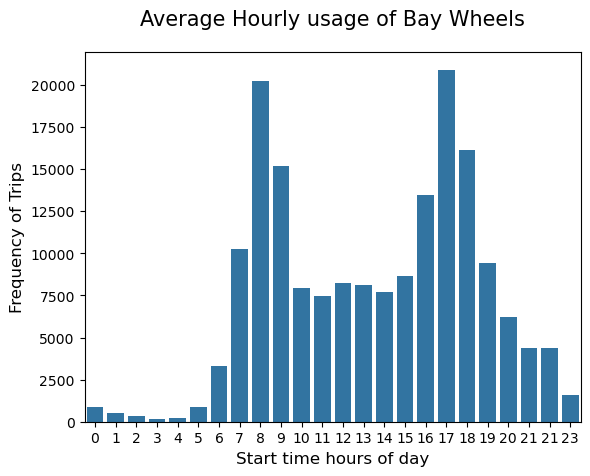

In [25]:
# Hourly usage of the bike system
x_axis = df_copy['start_time_hour']
x_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,21,23]

# Arguments for plot_labels function
title = "Average Hourly usage of Bay Wheels"
x_label = 'Start time hours of day'
y_label = 'Frequency of Trips'

# Plotting the chart
countplot(x_plot = x_axis, order = x_order)
plot_labels(title, x_label, y_label)

> The chart above is bimodal, the time peaks at 08:00hrs and at 17:00hrs. This might also be related to work because most workers go to work around 8am and leave work around 5pm.
>

#### What is the average daily peak hour of the bike system using the end time hour?

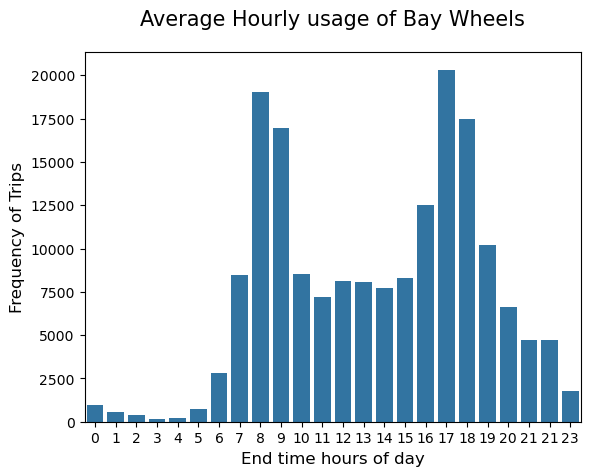

In [26]:
x_axis = df_copy['end_time_hour']
x_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,21,23]

# Arguments for plot_labels function
title = "Average Hourly usage of Bay Wheels"
x_label = 'End time hours of day'
y_label = 'Frequency of Trips'

# Plotting the chart
countplot(x_plot=x_axis , order= x_order)
plot_labels(title, x_label, y_label)

> From the above chart, the peak hours are still aroud 08:00hrs and 17:00hrs. However, there are more trips in and around 17:00hrs and 18:00hrs than when the trip started.

#### How long do the trips take?

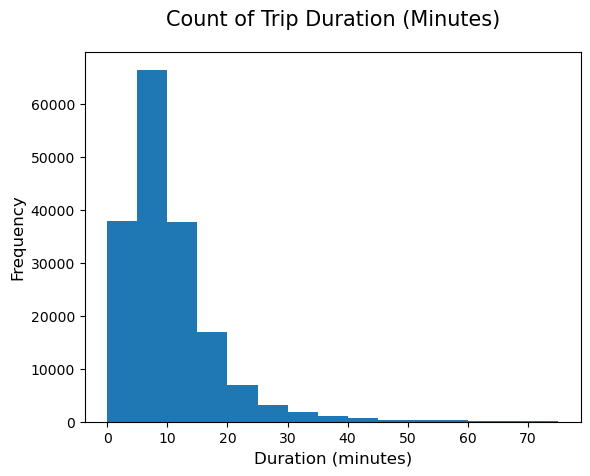

In [27]:
# Distribution of duration time.
bin_edges = np.arange(0, 80, 5)

plt.hist(data = df_copy, x = 'duration_min', bins = bin_edges)
plt.title("Count of Trip Duration (Minutes)", y=1.05, fontsize=15, fontweight='medium')
plt.xlabel('Duration (minutes)', y=1.05, fontsize=12, fontweight='medium' );
plt.ylabel('Frequency', y=0.5, fontsize=12, fontweight='medium');

> The chart above tells us that most trips take between 1 and 15 minutes. 

#### What is the age Distribution of the Users?

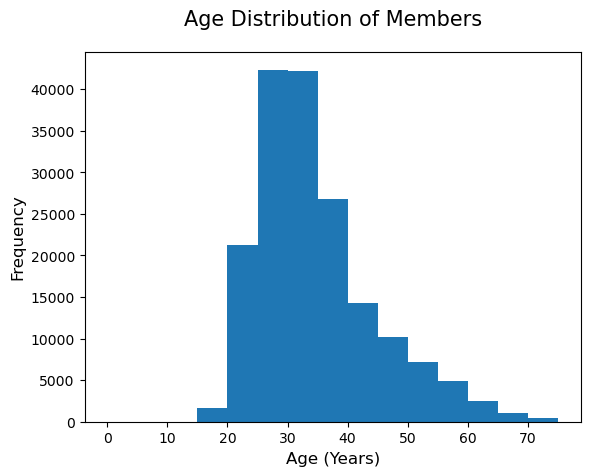

In [28]:
# Distribution of Age of customers.
bin_edges = np.arange(0, 80, 5)

plt.hist(data = df_copy, x = 'member_age', bins = bin_edges)
plt.title("Age Distribution of Members", y=1.05, fontsize=15, fontweight='medium')
plt.xlabel('Age (Years)', y=1.05, fontsize=12, fontweight='medium' );
plt.ylabel('Frequency', y=0.5, fontsize=12, fontweight='medium');

> The chart above tells us that most users are between the age of 20 and 45 years of age. The older the age the lesser they are likely to be customers.

#### Do users take bike share for all their trips?

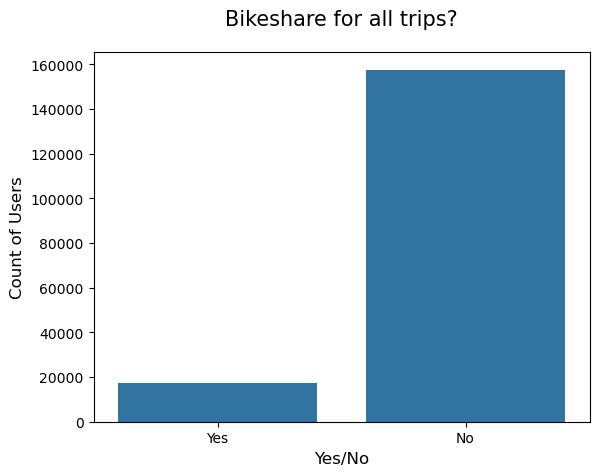

In [29]:
# Values for the functions
all_trips = [ 'Yes', 'No']
x_axis = df_copy['bike_share_for_all_trip']

# Chart labels
title = "Bikeshare for all trips?"
x_label = 'Yes/No'
y_label = 'Count of Users'

# Plot the chart
countplot(x_plot = x_axis, order = all_trips)
plot_labels(title, x_label, y_label);

> From the above chart, we can see that most users do use bikeshare for all trips. Only a fraction of users take bikeshare for all trips.
>

#### What are the percentage of users' gender?

In [30]:
# Unique genders
df_copy['member_gender'].unique()

['Male', 'Other', 'Female']
Categories (3, object): ['Female', 'Male', 'Other']

In [31]:
# First, we calculate the proportion of users gender
male_count = df_copy.query('member_gender == "Male"')['bike_id'].count()
female_count = df_copy.query('member_gender == "Female"')['bike_id'].count()
other_count = df_copy.query('member_gender == "Other"')['bike_id'].count()

male_prop = male_count / df_copy['bike_id'].count()
female_prop = female_count / df_copy['bike_id'].count()
other_prop = other_count / df_copy['bike_id'].count()

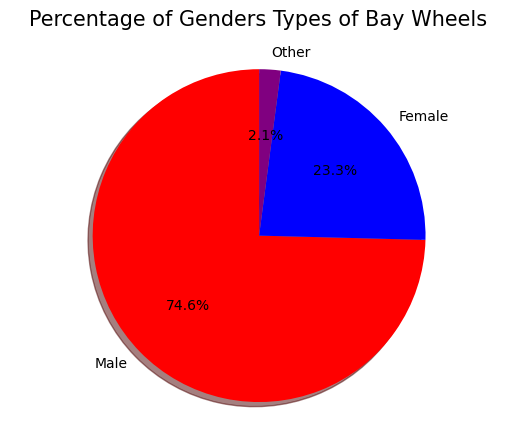

In [32]:
label = ['Male', 'Female', 'Other'] 
sizes = [male_prop, female_prop, other_prop]
colors = ['red', 'blue', 'purple']

plt.pie(sizes,  colors = colors, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Genders Types of Bay Wheels", y=1.05, fontsize=15, fontweight='medium');

plt.show()

> From the pie chart, it is revealed that almost 75% of users are Male while 23.3% of users are Females.

#### What are the proportion of the user types?

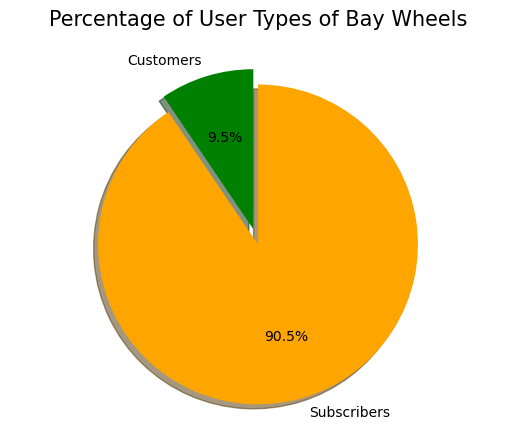

In [33]:
# Calculate the proportion of user type
customer_count = df_copy.query('user_type == "Customer"')['bike_id'].count()
subscriber_count = df_copy.query('user_type == "Subscriber"')['bike_id'].count()

customer_prop = customer_count / df_copy['bike_id'].count()
subscriber_prop = subscriber_count / df_copy['bike_id'].count()

labels = ['Customers', 'Subscribers'] 
sizes = [customer_prop, subscriber_prop]
colors = ['green', 'orange']
explode = (0, 0.1) # Explode subscribers slice

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of User Types of Bay Wheels", y=1.05, fontsize=15, fontweight='medium');

plt.show()

> From the pie chart, it is revealed that 90.5%  of users are subscribers while just 9.5% of users are customers.

## Bivariate Exploration

> In this section, the relationships between two variables in the will be investigated.
data.


#### What is the average number of daily trips by gender?

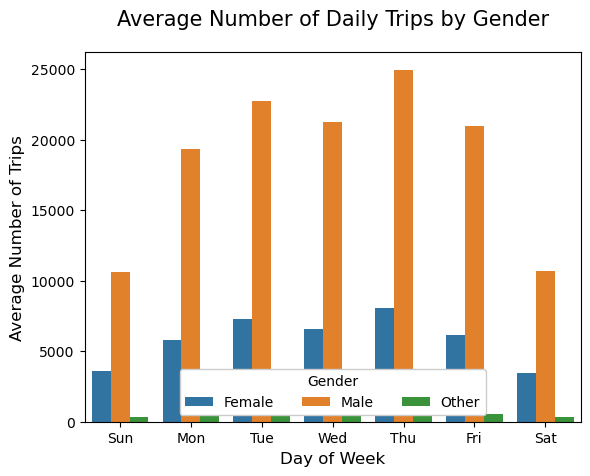

In [34]:
days = [ 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Chart labels
title = "Average Number of Daily Trips by Gender"
x_label = 'Day of Week'
y_label = 'Average Number of Trips'

ax = sb.countplot(data = df_copy, x = 'start_time_day', hue = 'member_gender', order=days);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Gender')
plot_labels(title, x_label, y_label);

> As expected, males take more trips, then females and then others. This is because there are more males than other genders in the userbase.

#### What is the average number of daily trips by user type?

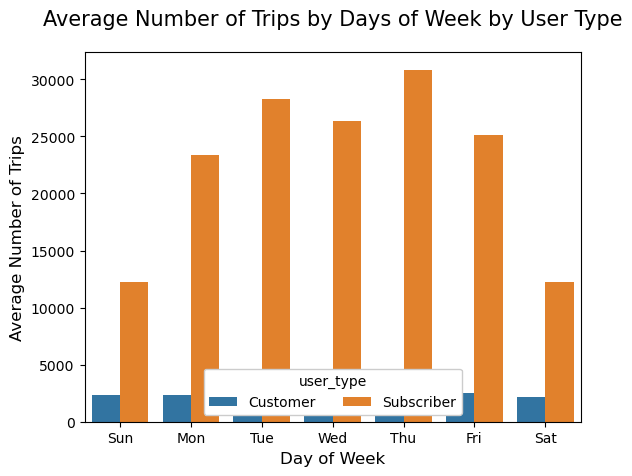

In [35]:
# Relationship between days of the week and user type
days = [ 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'] # Order of plot

# Labels of plot
title = ("Average Number of Trips by Days of Week by User Type")
x_label = 'Day of Week'
y_label = 'Average Number of Trips'

ax = sb.countplot(data = df_copy, x = 'start_time_day', hue = 'user_type', order=days);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type')
plot_labels(title, x_label, y_label);

> Also as expected, the subscribers takess more trip than the customers however, the customers trip accross the days of the week seems constant, while that of the subcribers flunctuate from dats to days.
>
> This may be due to the fact that there are more subscribers than there are customers.

#### What is the peak hour based on User type?

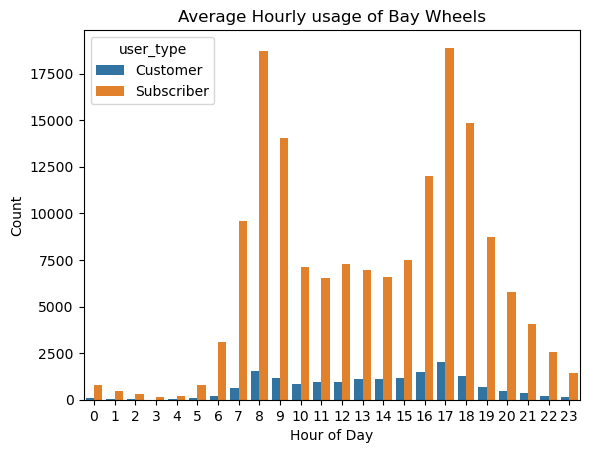

In [36]:
# Using Seaborn to get how the customers use the bikes.
sb.countplot(data=df_copy, x='start_time_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count')
plt.title('Average Hourly usage of Bay Wheels');

> From the above, the subscribers use the bikes more than the customeres which is to be expected. The peak time for both subscribers and the customers are around 8 am and 5 pm. This might be due to the fact that people resume work and close from work around those times.
>
#### How is the share of users in using bikeshare for all trips or not?

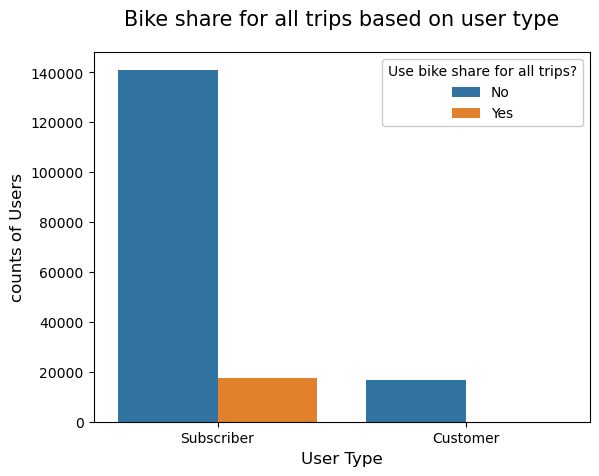

In [37]:
# Relationship between days of the week and user type

# Labels
title = "Bike share for all trips based on user type"
xlabel = "User Type"
ylabel = "counts of Users"

ax = sb.countplot(data = df_copy, x = 'user_type', hue = 'bike_share_for_all_trip', order=df_copy.user_type.value_counts().index)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Use bike share for all trips?')
plot_labels(title, xlabel, ylabel);

> From the above, it can be seen that all customers did not use bike share for all trips. Also, the subscribers that used bike share for all trips are very little.
>

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### What is the average duration of trips by days of weeks and usertype?

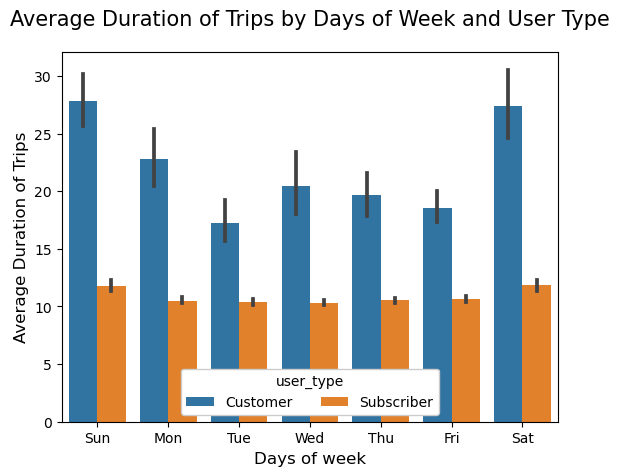

In [38]:
# Labels
title = "Average Duration of Trips by Days of Week and User Type"
xlabel = "Days of week"
ylabel = "Average Duration of Trips"

ax = sb.barplot(data = df_copy, x = 'start_time_day', y = 'duration_min', hue = 'user_type', order = days);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type');
plot_labels(title, xlabel, ylabel);

> The average duration of the subcribers are between 10 and 15 minutes while that of customers are between 15 and 30 minutes. 
>
> The customers average time is more than the subscribers, this may be due to the fact that there are less customers which make their average time more than the subscribers who are more.
>
> Both the customers and the subscribers peak days are Sundays and Saturdays, however the down days is Tuesday for customers while that of the subscribers seems to be constant from Tuesday to Thursday.
>
> Another observation is that the average duration of trips is more for the customers than the subscribers, this may due to the fact that there are less customers compared to the number of trips taken by customers and there are more subscribers compared compared to the trips the subscribers take.

#### What is the average duration of trips during the week by gender?

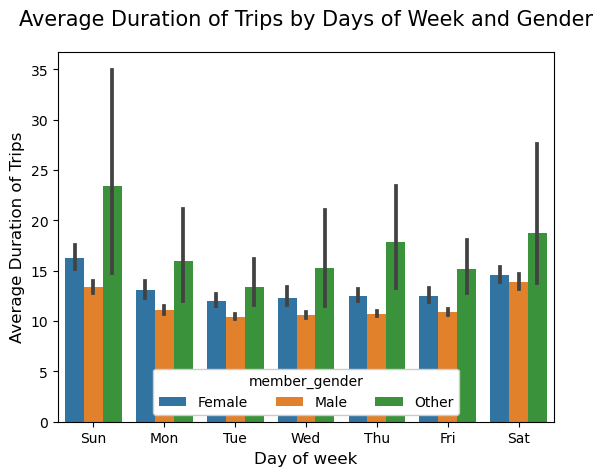

In [39]:
# Labels
title = "Average Duration of Trips by Days of Week and Gender"
xlabel = "Day of week"
ylabel = "Average Duration of Trips"

ax = sb.barplot(data = df_copy, x = 'start_time_day', y = 'duration_min', hue = 'member_gender', order = days);
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender');
plot_labels(title, xlabel, ylabel);

> From the above, the 
> The average duration of trips is inversely proportional to the number of the trips by the different genders. This means the more the gender trips, the less the average trips.

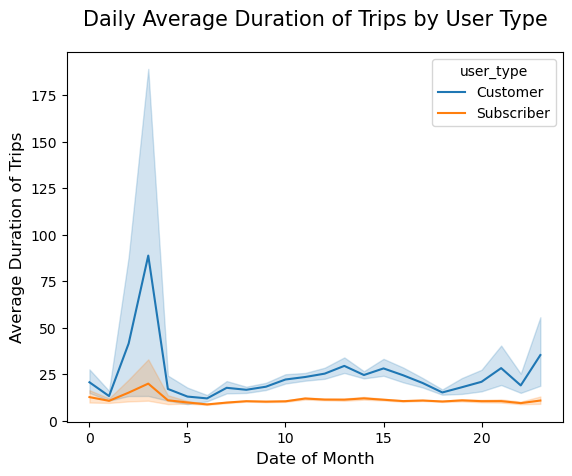

In [40]:
# Labels
title = "Daily Average Duration of Trips by User Type"
xlabel = "Date of Month"
ylabel = "Average Duration of Trips"

# Plot the chart
ax = sb.lineplot(x='start_time_hour', y='duration_min',
                  hue="user_type", data=df_copy)
plot_labels(title, xlabel, ylabel);

> The beginning of the month is when most customers take their rides, this might be due to being paid salaries at month end or monthly resolutions. For the sucbcribers there is a slight uptake in average rides at the beginning but it looks constant accross the month.

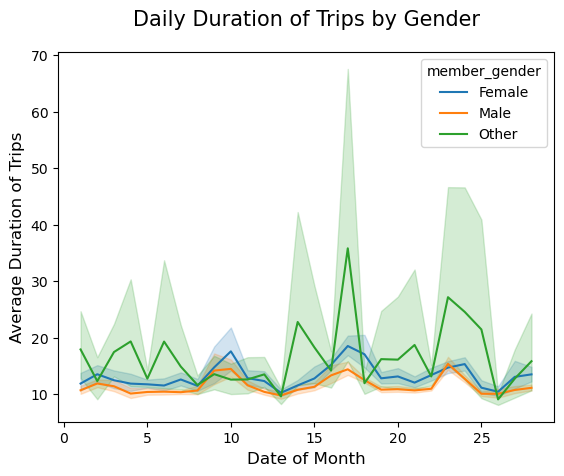

In [41]:
# Labels
title = "Daily Duration of Trips by Gender"
xlabel = "Date of Month"
ylabel = "Average Duration of Trips"

ax = sb.lineplot(x='start_date', y='duration_min',
                  hue="member_gender", data=df_copy)
plot_labels(title, xlabel, ylabel);

> From the chart above, there are different peak days accross the month for people who identify as other. The peak average peak trips do no pass 20 for both the male and female genders.

In [42]:
# Saving df_copy to csv
df_copy.to_csv('df_explored.csv',index=False)